In [1]:
%matplotlib notebook

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation
from IPython.display import display, Markdown

import numpy as np
from skimage.graph import route_through_array
import rasterio
import geopandas as gpd

from gridfinder._util import save_raster, clip_line_poly
from gridfinder.prepare import create_filter, prepare_ntl, prepare_roads
from gridfinder import gridfinder as gf
from gridfinder.post import threshold, accuracy, guess2geom

# Get inputs

In [3]:
targets_in = Path('tanzania/ntl.tif')
costs_in = Path('tanzania/roads_raster.tif')

In [4]:
targets, transform, start = gf.get_targets(targets_in)
costs = gf.get_costs(costs_in)

In [12]:
costs.shape

(360, 474)

# Create generator

In [33]:
iter_dist = gf.optimise_generator(targets, costs, start)

# Animate
Currently generating on the fly, could also copy all into a list of arrays and then animate after

<IPython.core.display.Javascript object>


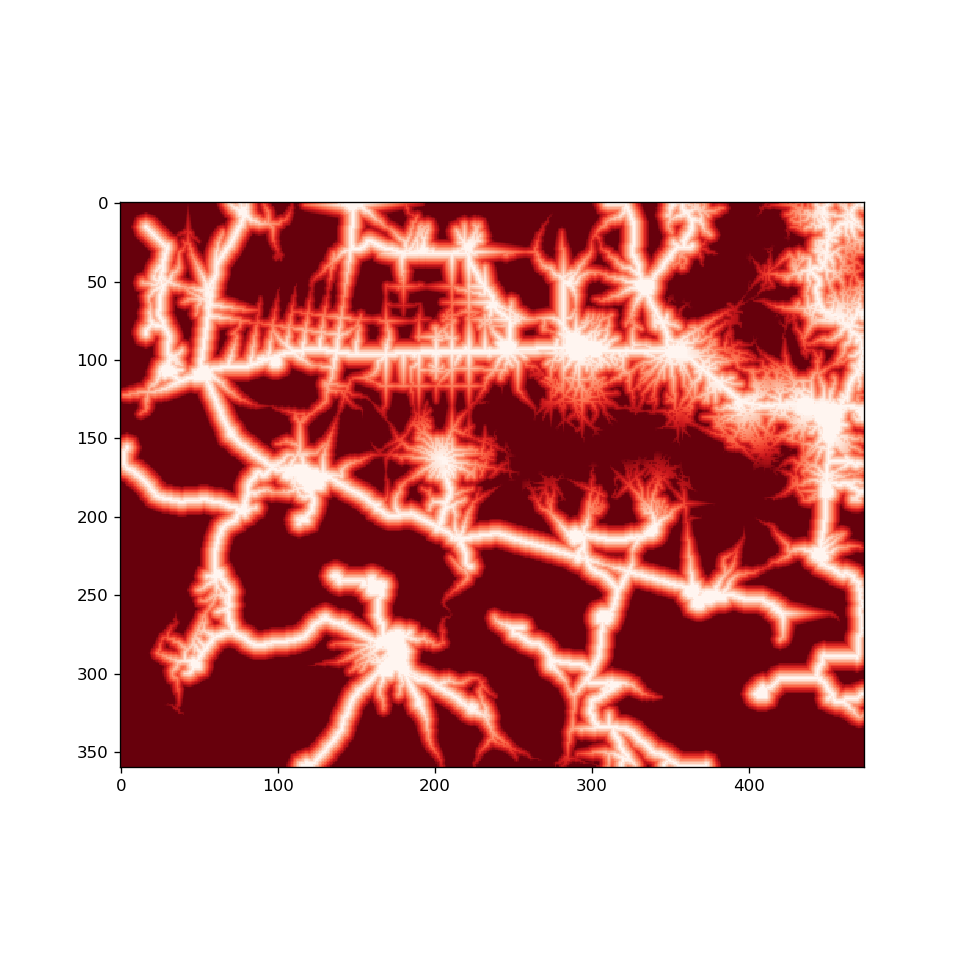

In [34]:
fig = plt.figure(figsize=(8, 8))

#im = plt.imshow(dists[10], animated=True)
im = plt.imshow(next(iter_dist), animated=True, vmin=0, vmax=10, cmap='viridis')

#count = 0
def updatefig(i):
    #global count
    #count += 1
    #im.set_data(dists[count])
    im.set_data(next(iter_dist))
    return im
    
ani = animation.FuncAnimation(fig, updatefig, interval=50)
plt.show()